# [2022 Spring - GCT535] HW 2

20214591 정윤진

In [39]:
import numpy as np

import librosa
import librosa.display
from scipy import signal

import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams

import IPython.display as ipd
import soundfile as sf

In [79]:
# Plotting Utils
def load_audio(f_name, sr=sr, offset=0, duration=None):
    x = librosa.load(f_name, sr=sr, offset=offset, duration=duration)[0]
    audio = ipd.Audio(x, rate=sr)
    ipd.display(audio)
    return x

def plot_amp(x, fs, sample_num=None):
    plt.figure(figsize=(10, 5))
    n = np.arange(x.shape[0] if sample_num==None else sample_num)
    plt.plot(n/fs, x if sample_num==None else x[:sample_num])
    plt.grid(True)
    plt.xlabel('Second')
    plt.ylabel('Amplitude')

def plot_amp_response(w, h):
    plt.figure(figsize=(10, 5))
    plt.plot(w, np.abs(h))
    plt.grid(True)
    plt.title('Amplitude Response')
    plt.xlabel('Frequency [rad/sample]')
    
def plot_freq_magnitude(x_fft, freq_range):
    plt.figure(figsize=(10, 5))
    x_mag = np.abs(x_fft)
    x_db = 20 * np.log10(x_mag/max(x_mag))
    plt.plot(freq_range, x_db)
    plt.grid(True)
    plt.title('dB Scale')
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('Decibel(dB)')

""" Referenced here - https://www.dsprelated.com/showcode/244.php """
def plot_zplane(p, z):
    ax = plt.subplot(111)
    
    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
    ax.add_patch(uc)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp(t1, markersize=10.0, markeredgewidth=1.0, markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp(t2, markersize=12.0, markeredgewidth=3.0, markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    plt.show()

***
## Problem #1: Convolution

### 2. Implement your own convolution function and verify the result in 1)

In [17]:
def my_conv(x,h):
    # x = input signal
    # h = impulse response
    # y = output signal

    ### Your Implementation of convolution ###
    x_size = x.shape[0]
    ker_size = h.shape[0]
    conv_size = x_size - ker_size + 1
    
    reversed_h = np.flip(h)
    y = np.zeros(conv_size + (2 * (ker_size - 1)))
    y_idx = 0
    
    # Left Transient State
    for i in range(1, ker_size):
        y[y_idx] = np.dot(x[:i], np.flip(h[:i]))
        y_idx += 1
    
    # Steady State
    for i in range(0, conv_size):
        y[y_idx] = np.dot(x[i:i+ker_size], reversed_h)
        y_idx += 1
    
    # Right Transient State
    for i in range(1, ker_size):
        y[y_idx] = np.dot(x[conv_size+i-1:], np.flip(h)[:ker_size-i])
        y_idx += 1

    return y

In [20]:
x = np.array([1, 2, 3, 2])
h = np.array([3, -1, -2])
my_conv(x, h)

array([ 3.,  5.,  5., -1., -8., -4.])

### 3.Run “my_conv.m” with the following simple filters using the provided snare drum file, “Snare.wav” as an input.

In [96]:
sr = 44100
audio = load_audio('./Snare.wav', sr=sr)

In [97]:
h1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
sf.write('result_1.wav', my_conv(audio, h1), sr, 'PCM_16')
audio = load_audio('result_1.wav', sr=sr)

In [98]:
h2 = np.array([1, -2, 1])
sf.write('result_2.wav', my_conv(audio, h2), sr, 'PCM_16')
audio = load_audio('result_2.wav', sr=sr)

***
## Problem #2: FIR Filter
### 3. What are the zeros? Display them on the z-plane.

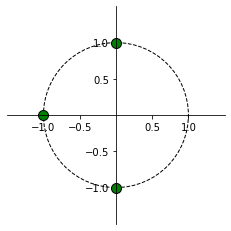

In [81]:
b = [0.25, 0.25, 0.25, 0.25]
a = [1]

p = np.roots(a)
z = np.roots(b)
plot_zplane(p, z)

### 4. Plot the amplitude response using the "freqz" function and discuss the result with zeros that you computed in 2).


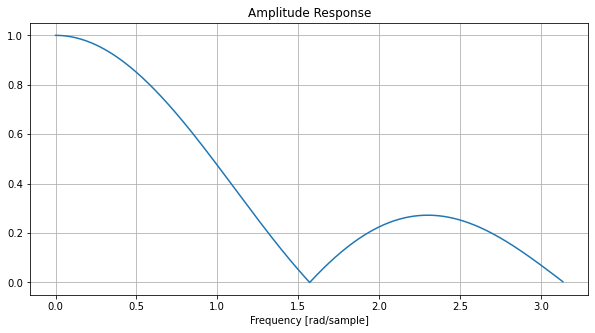

In [82]:
w, h = signal.freqz(b=b,a=a)
plot_amp_response(w, h)

***
## Problem #3: IIR Filter
### 2. What are the zeros and poles? Display them on the z-plane

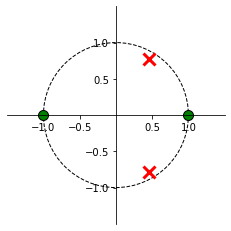

In [100]:
b = [1, 0, -1]
a = [1, -0.9, 0.81]

p = np.roots(a)
z = np.roots(b)
plot_zplane(p, z)

### 3. Plot the amplitude response using the "freqz" function and discuss the result with poles and zeros that you computed.

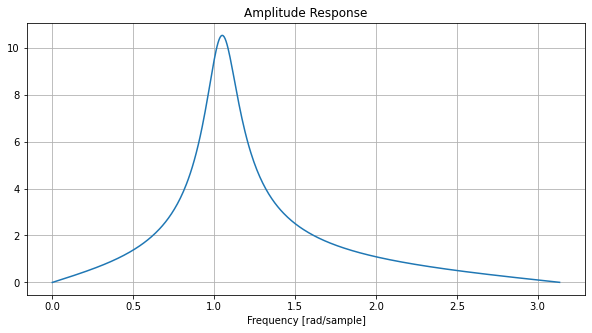

In [85]:
w, h = signal.freqz(b=b, a=a)
plot_amp_response(w, h)

***
## Problem #4: Wind Sound Design
### 1. Generate 2-sec white noise using the “np.rand” function.

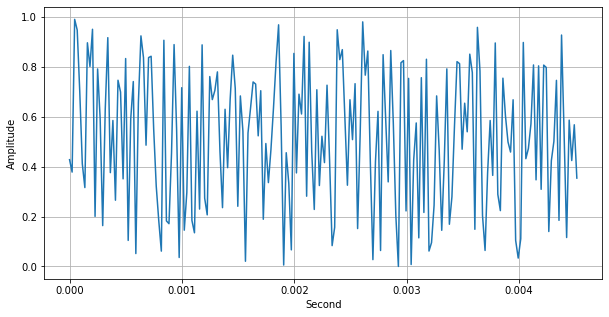

In [87]:
sr = 44100
duration = 2
noise = np.random.rand(sr*duration)
plot_amp(noise, sr, sample_num=200)

audio = ipd.Audio(noise, rate=sr)
ipd.display(audio)

### 2. Take a segment of the white noise with a large window size (e.g. 4096 samples) and plot the FFT magnitude.

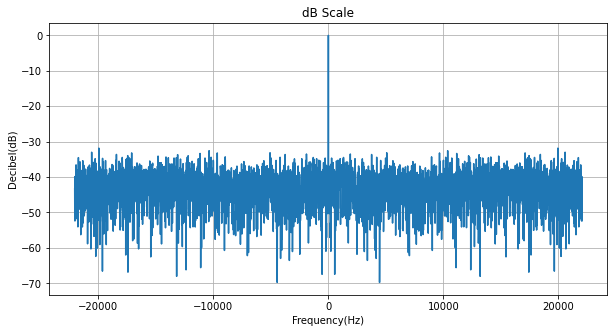

In [88]:
window_size = 4096
fft_size = 4096
segment = noise[:window_size]

x_fft = np.fft.fft(segment)
x_fft = np.fft.fftshift(x_fft, axes=0)

freq_range = np.arange(-(fft_size/2), (fft_size/2))*sr/fft_size
plot_freq_magnitude(x_fft, freq_range)

### 3. Implement a resonant filter using “signal.lfilter” (you can use the implementation from our practice code) and find an apropriate cut-off frequency and Q value to design a wind sound. Submit the output as a wav file with 16 bit and 44.1kHz sampling rate format.

In [99]:
r = 0.999
fc = 400
sr = 44100
theta = 2*np.pi*fc/sr
a = [1, -2*r*np.cos(theta), r*r] # resonant filter
b = [1, 1] # low pass filter

y = signal.lfilter(b, a, noise)
sf.write('wind_sound.wav', y, sr, 'PCM_16')

ipd.Audio(y, rate=sr)

### 4. Plot the amplitude response of the resonant low-pass filter using the "freqz" function.

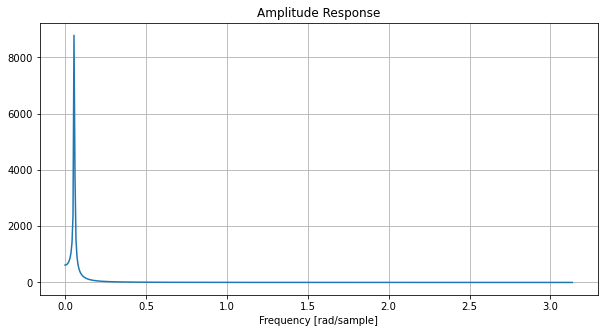

In [90]:
w, h = signal.freqz(b=b, a=a)
plot_amp_response(w, h)

### 5. Take a segment of the wind sound with a large window size (e.g. 4096 samples) and plot the FFT magnitude.

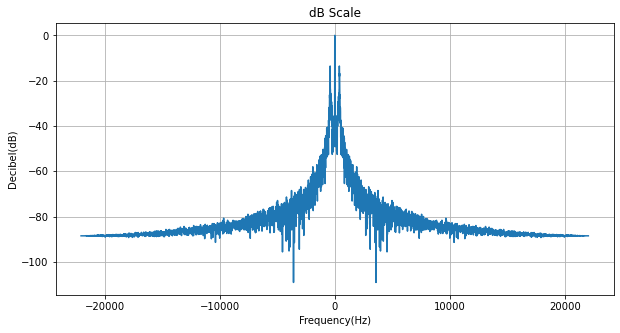

In [101]:
window_size = 4096
fft_size = 4096
segment = y[:window_size]
x_fft = np.fft.fft(segment)
x_fft = np.fft.fftshift(x_fft, axes=0)
freq_range = np.arange(-(fft_size/2), (fft_size/2))*sr/fft_size
plot_freq_magnitude(x_fft, freq_range)